In [43]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [44]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
df = pd.read_csv(url, header=None)

In [45]:
pip install ucimlrepo

# Exploratory Data Analysis

In [46]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

This data set has many different attributes for each person and equates the person, containing each attribute, to a certain credit score, 1 being good and 2 being bad. I am going to expolore a couple of these attributes and see if I see any trends.

In [47]:
data_array = np.array(statlog_german_credit_data.data.data)

In [48]:
features_array = np.array(statlog_german_credit_data.data.features)
features_array

array([['A11', 6, 'A34', ..., 1, 'A192', 'A201'],
       ['A12', 48, 'A32', ..., 1, 'A191', 'A201'],
       ['A14', 12, 'A34', ..., 2, 'A191', 'A201'],
       ...,
       ['A14', 12, 'A32', ..., 1, 'A191', 'A201'],
       ['A11', 45, 'A32', ..., 1, 'A192', 'A201'],
       ['A12', 45, 'A34', ..., 1, 'A191', 'A201']], dtype=object)

In [49]:
target_array = np.array(statlog_german_credit_data.data.targets)
target_array[:5]

array([[1],
       [2],
       [1],
       [1],
       [2]])

In [50]:
workers = len(target_array)
print(workers)

1000


In [51]:
foreign_worker_count = np.sum(features_array == 'A201')
print(foreign_worker_count)

963


In [52]:
bad_credit_count = np.sum(target_array == 2)
print(bad_credit_count)

300


In [53]:
credit_and_foreign = []
for i in range(len(features_array)):
    if features_array[i, 19] == 'A201' and target_array[i] == 2:
        credit_and_foreign.append(i)

print(len(credit_and_foreign))


296


In [54]:
ratio_of_foreign_and_bad = bad_credit_count / foreign_worker_count
print(ratio_of_foreign_and_bad)


0.3115264797507788


In [55]:
percentage_ratio = ratio_of_foreign_and_bad * 100
print(f"{percentage_ratio:.3f}%")

31.153%


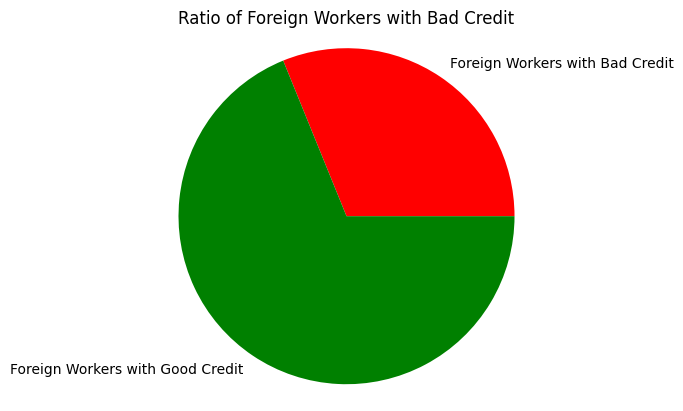

In [56]:
import matplotlib.pyplot as plt
labels = ['Foreign Workers with Bad Credit', 'Foreign Workers with Good Credit']
sizes = [31.153, 100 - 31.153]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Ratio of Foreign Workers with Bad Credit')
plt.show()

Hmmm... most foreign workers seem to have good credit scores...

In [99]:
credit = features_array[:, 19]
foreign_cred = np.array(credit)

In [58]:
credit_ratio_all_workers = np.sum(target_array == 2) / len(target_array)
print(credit_ratio_all_workers)

0.3


In [59]:
bad_credit_foreign_ornot=(len(credit_and_foreign)/np.sum(target_array == 2))
print(bad_credit_foreign_ornot)

0.9866666666666667


<function matplotlib.pyplot.show(close=None, block=None)>

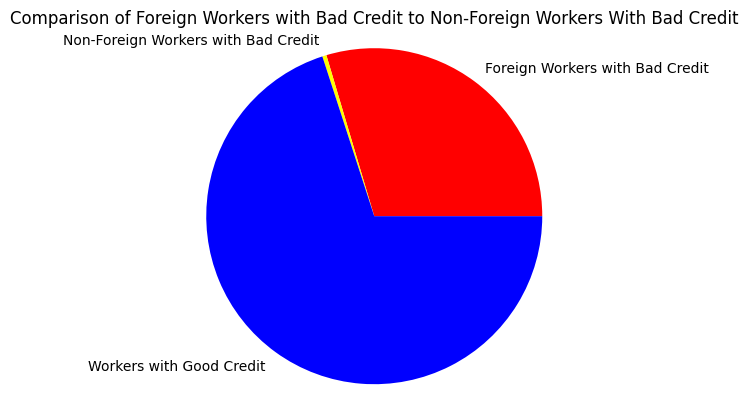

In [60]:
import matplotlib.pyplot as plt
labels = ['Foreign Workers with Bad Credit','Non-Foreign Workers with Bad Credit', 'Workers with Good Credit']
sizes = [296, 300-296, len(target_array)-np.sum(target_array == 2)]
colors = ['red', 'yellow', 'blue']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Comparison of Foreign Workers with Bad Credit to Non-Foreign Workers With Bad Credit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

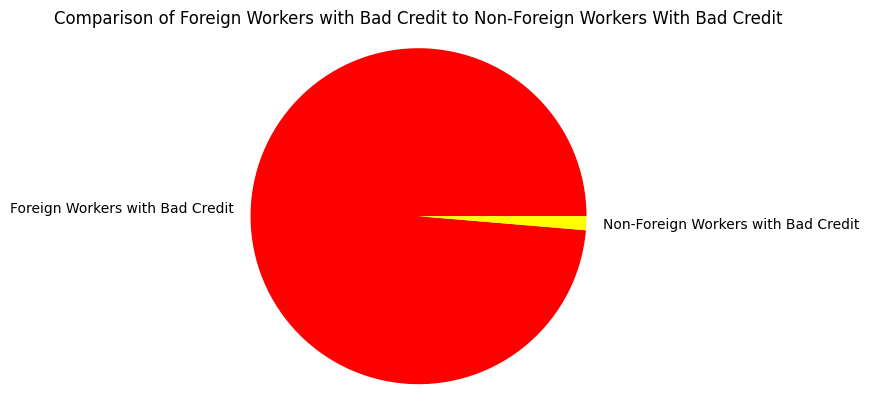

In [61]:
import matplotlib.pyplot as plt
labels = ['Foreign Workers with Bad Credit','Non-Foreign Workers with Bad Credit']
sizes = [296, 300-296]
colors = ['red', 'yellow']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Comparison of Foreign Workers with Bad Credit to Non-Foreign Workers With Bad Credit')
plt.show

Interesting... Most of the workers with bad credit are foreign.... It seems like it is significantly more difficult for foreign workers to keep their credit scores up then non-foreign workers.

In [62]:
age = features_array[:, 12]

In [63]:
age_and_credit = zip(age, target_array)
age_and_credit = list(age_and_credit)
age_and_good_credit = []
for i in range(len(age_and_credit)):
    if age_and_credit[i][1] == 1:
        age_and_good_credit.append(age_and_credit[i][0])

In [64]:
senior = 0
middle_aged = 0
young_adult = 0

for i in range(len(age_and_good_credit)):
    if age_and_good_credit[i] >= 60:
      senior+=1
    elif age_and_good_credit[i] >= 30:
      middle_aged+=1
    else:
      young_adult+=1
print("The amount of seniors with good credit is:" + str(senior))
print("The amount of middle age adults with good credit is:" + str(middle_aged))
print("The amount of young adults with good credit is:" + str(young_adult))

The amount of seniors with good credit is:38
The amount of middle age adults with good credit is:428
The amount of young adults with good credit is:234


This makes it seem like German seniors don't have good credit, but how many seniors are even working compared to younger adults?

In [65]:
seniors = []
for i in range(len(age)):
    if age[i] >= 60:
        seniors.append(i)
print(len(seniors))

51


So there are actually only 51 seniors, which means 38/51 have good credit.

In [66]:
senior_good_ratio = senior / len(seniors)
print("Senior credit ratio:" + str(senior_good_ratio))
middle_age = []
younger_adults = []
for i in range(len(age)):
    if age[i] >= 30 and age[i] < 60:
        middle_age.append(i)
    elif age[i] < 30:
        younger_adults.append(i)
middle_good_ratio = middle_aged/len(middle_age)
print("Middle age ratio:"+ str(middle_good_ratio))
younger_good_ratio = young_adult/len(younger_adults)
print("Young adult ratio:"+ str(younger_good_ratio))

Senior credit ratio:0.7450980392156863
Middle age ratio:0.740484429065744
Young adult ratio:0.6307277628032345


<function matplotlib.pyplot.show(close=None, block=None)>

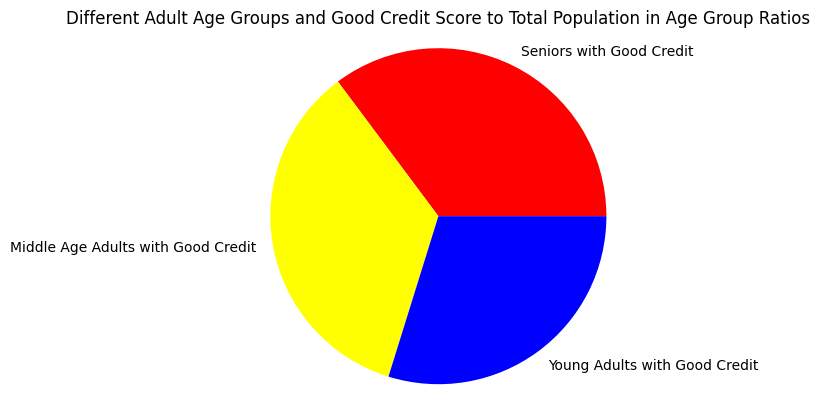

In [67]:
import matplotlib.pyplot as plt
labels = ['Seniors with Good Credit', 'Middle Age Adults with Good Credit', 'Young Adults with Good Credit']
sizes = [0.7450980392156863, 0.740484429065744, 0.6307277628032345]
colors = ['red', 'yellow', 'blue']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Different Adult Age Groups and Good Credit Score to Total Population in Age Group Ratios')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

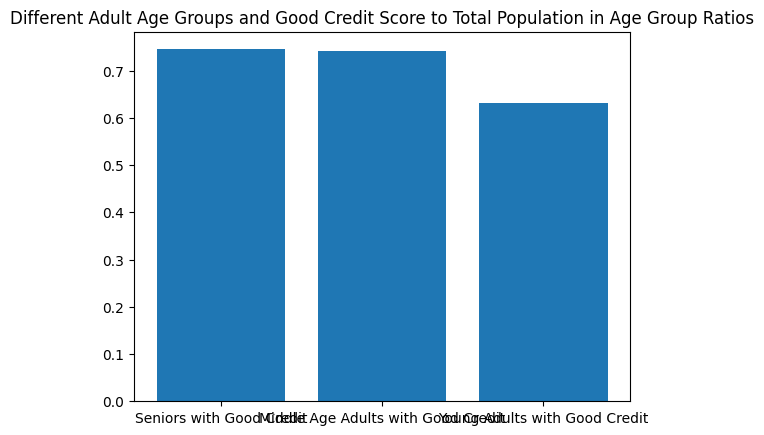

In [68]:
plt.bar(labels, sizes)
plt.title('Different Adult Age Groups and Good Credit Score to Total Population in Age Group Ratios')
plt.show

hmm these are close, however it does seem like younger adults tend to have worse credit.

# Hypothesis Formation

Hypothesis 1: If the age of a worker is younger than 30, then that worker will be more likely to have a bad credit score.

Hypothesis 2: If a worker is foreign, then that worker is more likely to have a bad credit score.

# Hypothesis Testing

### Age Hypothesis (Visualizations and Correlation)

<function matplotlib.pyplot.show(close=None, block=None)>

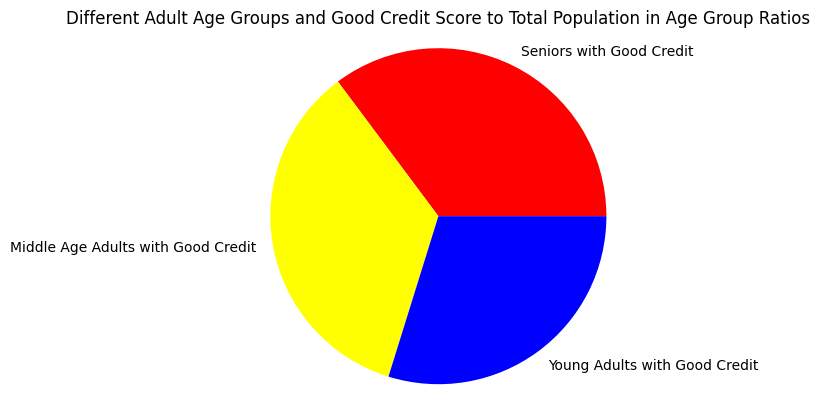

In [69]:
import matplotlib.pyplot as plt
labels = ['Seniors with Good Credit', 'Middle Age Adults with Good Credit', 'Young Adults with Good Credit']
sizes = [0.7450980392156863, 0.740484429065744, 0.6307277628032345]
colors = ['red', 'yellow', 'blue']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Different Adult Age Groups and Good Credit Score to Total Population in Age Group Ratios')
plt.show

It is hard to tell with the pie chart whether or not young adults have significantly lower credit than older adults, so I used a bar graph to see if it was more apperent.

<function matplotlib.pyplot.show(close=None, block=None)>

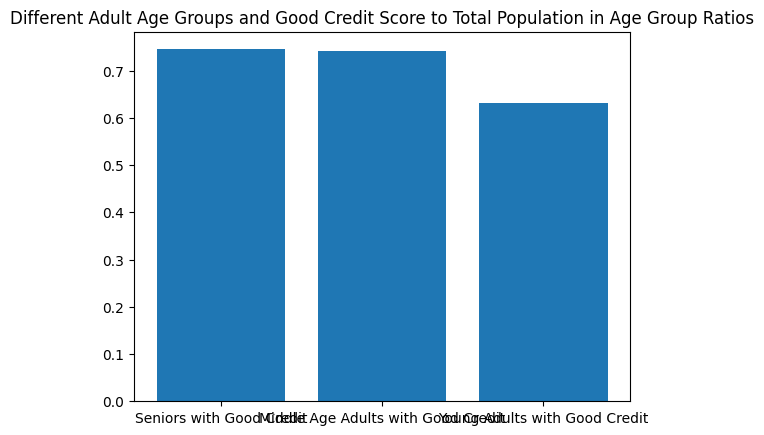

In [70]:
plt.bar(labels, sizes)
plt.title('Different Adult Age Groups and Good Credit Score to Total Population in Age Group Ratios')
plt.show

0.7408585055643879


<function matplotlib.pyplot.show(close=None, block=None)>

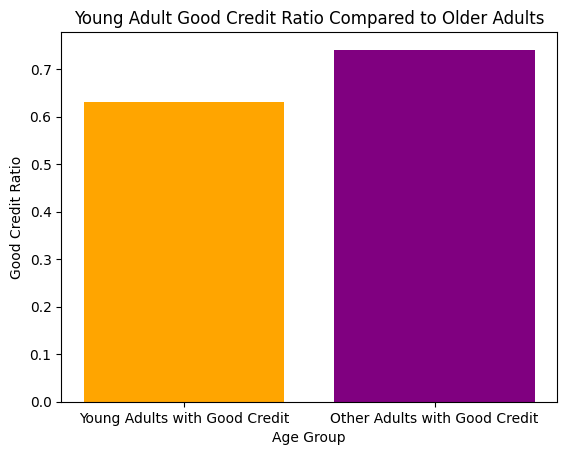

In [78]:
others = 0
for i in range(len(age)):
    if age[i] >= 30:
        others +=1
others_good_credit = 0
for i in range(len(age_and_good_credit)):
    if age_and_good_credit[i] >= 30:
        others_good_credit +=1

others_good_ratio = others_good_credit/others
print(others_good_ratio)


labels = ['Young Adults with Good Credit', 'Other Adults with Good Credit']
sizes = [younger_good_ratio, others_good_ratio]
colors = ['orange', 'purple']
plt.bar(labels, sizes, color=colors)
plt.xlabel('Age Group')
plt.ylabel('Good Credit Ratio')
plt.title('Young Adult Good Credit Ratio Compared to Older Adults')
plt.show


It does appear more apparent here, however, is it statistically significant? Since it is not fully apparent in the visualizations, I am going to find the correlation coefficient.

In [88]:

x = age.astype(int)
y = target_array.reshape(-1)
correlation = np.corrcoef(x, y)
r = correlation[0, 1]
print(r)
p = correlation[1,0]
print(p)

-0.0911274093194989
-0.0911274093194989


This can be turned into a matrix of Pearson correlation coefficients and since the two values are the same this is valid. Since the correlation value is almost -0.1, there is a negative correlation between age and credit score. Thus, the higher one's age gets, the more likely the credit score value is to drop from 2 to 1, meaning that it is more likely that an older person will have a better credit score.

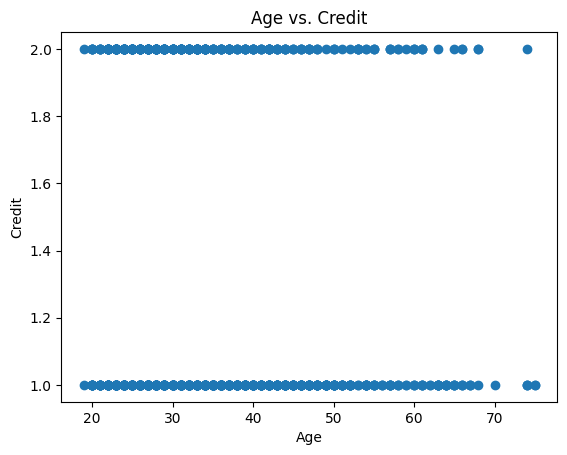

In [72]:
import matplotlib.pyplot as plt
plt.scatter(age, target_array)
plt.xlabel('Age')
plt.ylabel('Credit')
plt.title('Age vs. Credit')
plt.show()

This can be seen here as there are less data points in older ages for the value of 2, meaning there aren't as many older adults with bad credit scores as there are with good credit scores. This is disproving the null hypothesis, that a higher age does not prove a better credit score. I believe that this data is just barely significant enough to prove my hypothesis.

###Foreign Worker Hypothesis

<function matplotlib.pyplot.show(close=None, block=None)>

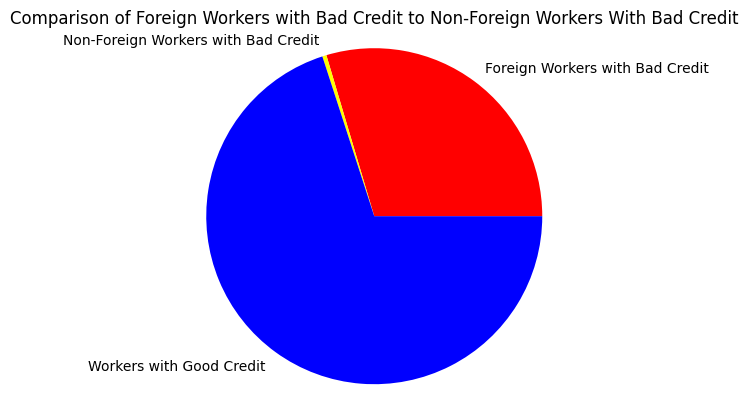

In [89]:
import matplotlib.pyplot as plt
labels = ['Foreign Workers with Bad Credit','Non-Foreign Workers with Bad Credit', 'Workers with Good Credit']
sizes = [296, 300-296, len(target_array)-np.sum(target_array == 2)]
colors = ['red', 'yellow', 'blue']
plt.pie(sizes, labels=labels, colors=colors)

plt.axis('equal')
plt.title('Comparison of Foreign Workers with Bad Credit to Non-Foreign Workers With Bad Credit')
plt.show

Here I show that the amount of foreign workers with bad credit is significantly larger than the amount of non-foreign workers with bad credit. This would disprove the null hypothesis, however, I realized that I never looked at the basic total ratio of foreign workers to non-foreign workers. If there is a large number of foreign workers compared to non-foreign workers, than this correlation that seems obvious in the pie chart might be disproved.

In [93]:
foreign_work = []
non_foreign = []
foreign_workerss = 0
non_foreign_workerss = 0
for i in range(len(credit)):
    if credit[i] == 'A201':
        foreign_workerss +=1
        foreign_work.append(i)
    else:
        non_foreign_workerss +=1
        non_foreign.append(i)
print("Foreign worker count:" + str(foreign_workerss))
print("Non-foreign worker count:" + str(non_foreign_workerss))

Foreign worker count:963
Non-foreign worker count:37


Ok so this shows an obvious issue in my assumption, now I have to calculate the ratios to see if there is any correlation between a worker being foreign and their credit score. However, my null hypothesis may be proven correct.

In [94]:
total_worker_bad_credit_ratio = bad_credit_count/workers
print(total_worker_bad_credit_ratio)
foreign_worker_bad_credit_ratio = bad_credit_count/foreign_workerss
print(foreign_worker_bad_credit_ratio)

0.3
0.3115264797507788


hmmm, not sure if this is enough to be significant.

In [111]:
import matplotlib.pyplot as plt
import numpy as np

workk = []
for i in range(len(credit)):
    if credit[i] == 'A201':

        workk.append(1)
    else:
        workk.append(0)
x = workk
y = target_array.reshape(-1)
correlation = np.corrcoef(x, y)
r = correlation[0, 1]
print(r)
p = correlation[1,0]
print(p)

0.08207949878149608
0.08207949878149609


Surprisingly the corelation coefficient isn't as close to 0 as I had expected. However, it is still very weak. It shows that there is a weak relationship between a workers resident status and their credit score. It shows that foreign workers tend to be more likely to have bad credit status. This is because I set the value of foreign workers to be 1 and non-foreign to be 0. Since bad credit is 2 and good is 1, a positive correlation would mean that foreign workers show a larger amount of bad credit scores than non-foreign workers. Although the previous hypothesis was easy to round to a tenth of a decimal place for correlation, this one is much farther from the nearest tenths decimal place so it would be easier to prove the null hypothesis correct. I think, while close to the absolute value of the other hypothesis correlation, these hypothesis tests have shown that this data could just be a fluke. I am not sure how to find the standard deviation of a correlation so I cannot check the significance of the correlation value, but I will assume that it is too weak to prove the hypothesis correct.

#Documentation and Recording

I documented much of this as I was going along but I will go back through and speak on my thought process. At first I just started splitting the data up and playing around with different organizations of it. I ended up importing the data by using an "import to python" button on the data set's website. I then decieded to look at different attributes of the data because it was broken up into different categories. I realized that these categories may be specific causes of good or bad credit so I decided to look into that. I used python to take out specific attributes and put them into new, seperate, arrays. I then started using the code to analyze these attributes, comparing them to the data set containing the values of good or bad credit. I ended up looking at foreign workers. Initially I figured that the amount of foreign workers was probably less than the amount of non-foreign workers. I used loops to connect the workers to the array of good and bad credit and then calculated the ratios and percentages of foreign workers with bad credit. I put this into a pie chart and saw that there were many foreign workers with bad credit. So naturally I compared this to the amount of non-foreign workers with bad credit and was shocked by the small amount of non-foreign workers with bad credit. I knew I wanted to turn this into a hypothesis and further examine it later. I then began looking at the ages of the workers. I looked at how many workers there were in three different age groups that I created. I turned each age group into an array and sorted the workers into each array as necessary. I used these arrays and the total number of workers and then looked at which group had the greatest ratio of good credit to worker amount. It seemed like the higher ages tended to be more likely to have better credit. I looked at this with a pie chart and then looked at it in a bar chart as I found that was much easier to visualize. When I was testing my hypotheses, I looked at my previous visualizations and then make some more visualizations. For my age data I wasn't sure visually if my hypothesis was significant so I combined the two older groups since they had similar ratios and compared that to the younger group of adults. In order to see whether or not this was truly significant I looked at the Pearson correlation coefficient and saw that it seemed to be just barely significant and that the data was negatively corolated, which I described in a text cell underneath. I then was able to conclude that my hypothesis(also defined above) was proven correct. When I was testing my hypothesis on foreign workers having worse credit, I realized that I never looked at the number of foreign workers compared to the total number of non-foreign workers, I just assumed it was lower. I proved myself completely wrong in this assumption as there was a much larger amount of non-foreign workers. I created new ratios to compare these unproportionate numbers and saw that the ratios were still leaning in favor of my hypothesis. I then created some visualizations but realized it would be more beneifical to run another coorolation test. When I did this, I saw that their was a linearly positive coorolation, however, it seemed to be just on the cusp of too weak so I concluded that it could just be coorolation from error and proved my null hypothesis correct. Throughout this assignment I used NumPy and MatPlotLib in many cells, this code helped me use mannyyy loops to compare my code and create new arrays. I then used MatPlotLib to visualize these arrays and further analyze them. My key finding in this assignment were that age is definitely related to credit. If an adult is over 30 years old, they are more likely to have good credit than an adult that is under 30. I also learned that foreign workers may have a higher likelyhood of having good credit, but it is unlikely. It is most likely that the residence status of a worker is unrelated the that workers credit score.